# Initialize

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Cleaning

In [3]:
# Load csv dataset
df = pd.read_csv("Data Assets/heart.csv")

# Rename columns for better understanding
df.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg_result',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression_exercise_vs_rest',
    'slope': 'slope_peak_exercise_st_segment',
    'ca': 'num_major_vessels_colored_by_fluoro',
    'thal': 'thalassemia_blood_disorder'
}, inplace=True)

In [4]:
df

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate_achieved,exercise_induced_angina,st_depression_exercise_vs_rest,slope_peak_exercise_st_segment,num_major_vessels_colored_by_fluoro,thalassemia_blood_disorder,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Check for any null values
df.isna().sum()

age                                    0
sex                                    0
chest_pain_type                        0
resting_blood_pressure                 0
serum_cholesterol                      0
fasting_blood_sugar                    0
resting_ecg_result                     0
max_heart_rate_achieved                0
exercise_induced_angina                0
st_depression_exercise_vs_rest         0
slope_peak_exercise_st_segment         0
num_major_vessels_colored_by_fluoro    0
thalassemia_blood_disorder             0
target                                 0
dtype: int64

# Predictive Module Creation

## KNN

In [12]:
# Set numerical fields as features (all but 'target' in this case)
features = df.drop(columns=['target'])

# Set 'target' as target
target = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [16]:
knn = KNeighborsClassifier(n_neighbors=10)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [20]:
accuracy = knn.score(X_test, y_test)
# Evaluate the model and print the accuracy score
std_accuracy = knn.score(X_test, y_test)
print(f"KNN Accuracy: {accuracy:.4f}")

KNN Accuracy: 0.7368


## KNN (Standardized)

In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the StandardScaler (Standardization instead of Normalization)
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize the KNN model with 10 neighbors
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN model on standardized data
knn.fit(X_train_std, y_train)

# Evaluate the model and print the accuracy score
std_accuracy = knn.score(X_test_std, y_test)
print(f"KNN Accuracy (Standardized): {std_accuracy:.4f}")

# Make predictions on the test set
y_pred = knn.predict(X_test_std)

KNN Accuracy (Standardized): 0.8553


### Prediction Outcomes

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8552631578947368
Precision: 0.8947368421052632
Recall: 0.8292682926829268


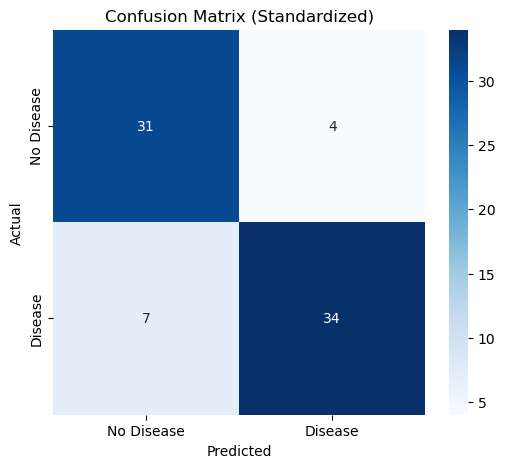

In [19]:
# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Standardized)')
plt.show()

# Model Devlopemnt 

## GridSearchCV

In [22]:
# Define KNN model
knn = KNeighborsClassifier()

# Set up the parameter grid to search
param_grid = {
    'n_neighbors': range(1, 31),            # Explore different neighbors (1-30)
    'weights': ['uniform', 'distance'],     # Weighting methods
    'p': [1, 2]                             # Distance metrics (1=Manhattan, 2=Euclidean)
}

# Initialize Grid Search with Cross-Validation (5-fold CV)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit Grid Search on the standardized training data
grid_search.fit(X_train_std, y_train)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

# Extract the best hyperparameters
best_params = grid_search.best_params_

# Initialize the KNeighborsClassifier with the best parameters
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], 
                           p=best_params['p'], 
                           weights=best_params['weights'])

# Train the KNN model on the standardized training data
knn.fit(X_train_std, y_train)

# Predict on the standardized test data
y_pred = knn.predict(X_test_std)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}
Best F1-Score: 0.8592645312512127


### Prediction Outcomes

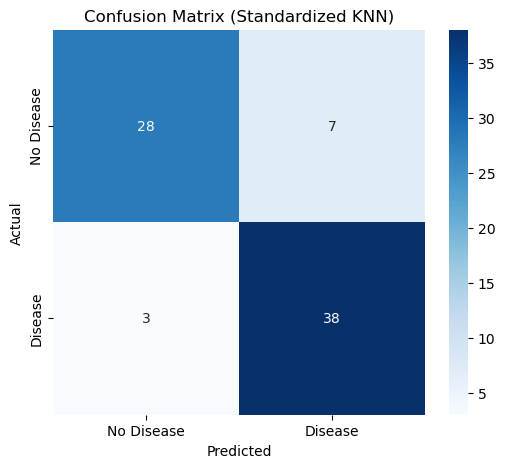

Accuracy of the best KNN model (Standardized): 0.8684
Cross-validation scores: [0.82608696 0.86956522 0.8        0.88888889 0.8       ]
Mean cross-validation score: 0.8369


In [57]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Standardized KNN)')

# Display the plot
plt.show()

# Evaluate the model accuracy on the standardized test set
accuracy = knn.score(X_test_std, y_test)
print(f"Accuracy of the best KNN model (Standardized): {accuracy:.4f}")

# Perform 5-fold cross-validation on the standardized training data
cv_scores = cross_val_score(knn, X_train_std, y_train, cv=5)

# Output the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.868421052631579
Precision: 0.8444444444444444
Recall: 0.926829268292683


## Decision Tree 

In [27]:
# Initialize the Decision Tree
tree = DecisionTreeClassifier(random_state=42)

# Train the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
dpred = tree.predict(X_test)

### Prediction Outcome

In [30]:
# Calculate the metrics
accuracy = accuracy_score(y_test, dpred)
precision = precision_score(y_test, dpred)
recall = recall_score(y_test, dpred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8026315789473685
Precision: 0.825
Recall: 0.8048780487804879


In [31]:
tree_viz = export_text(tree, feature_names=list(X_train.columns))
print(tree_viz)

|--- num_major_vessels_colored_by_fluoro <= 0.50
|   |--- thalassemia_blood_disorder <= 2.50
|   |   |--- st_depression_exercise_vs_rest <= 1.70
|   |   |   |--- resting_blood_pressure <= 167.00
|   |   |   |   |--- age <= 60.50
|   |   |   |   |   |--- resting_blood_pressure <= 109.00
|   |   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- sex >  0.50
|   |   |   |   |   |   |   |--- age <= 49.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  49.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- resting_blood_pressure >  109.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  60.50
|   |   |   |   |   |--- st_depression_exercise_vs_rest <= 0.20
|   |   |   |   |   |   |--- resting_blood_pressure <= 132.50
|   |   |   |   |   |   |   |--- exercise_induced_angina <= 0.50
|   |   |   |   |   |   |   |   |--- max_heart_rate_achieved <= 166.00
|   |   |   |

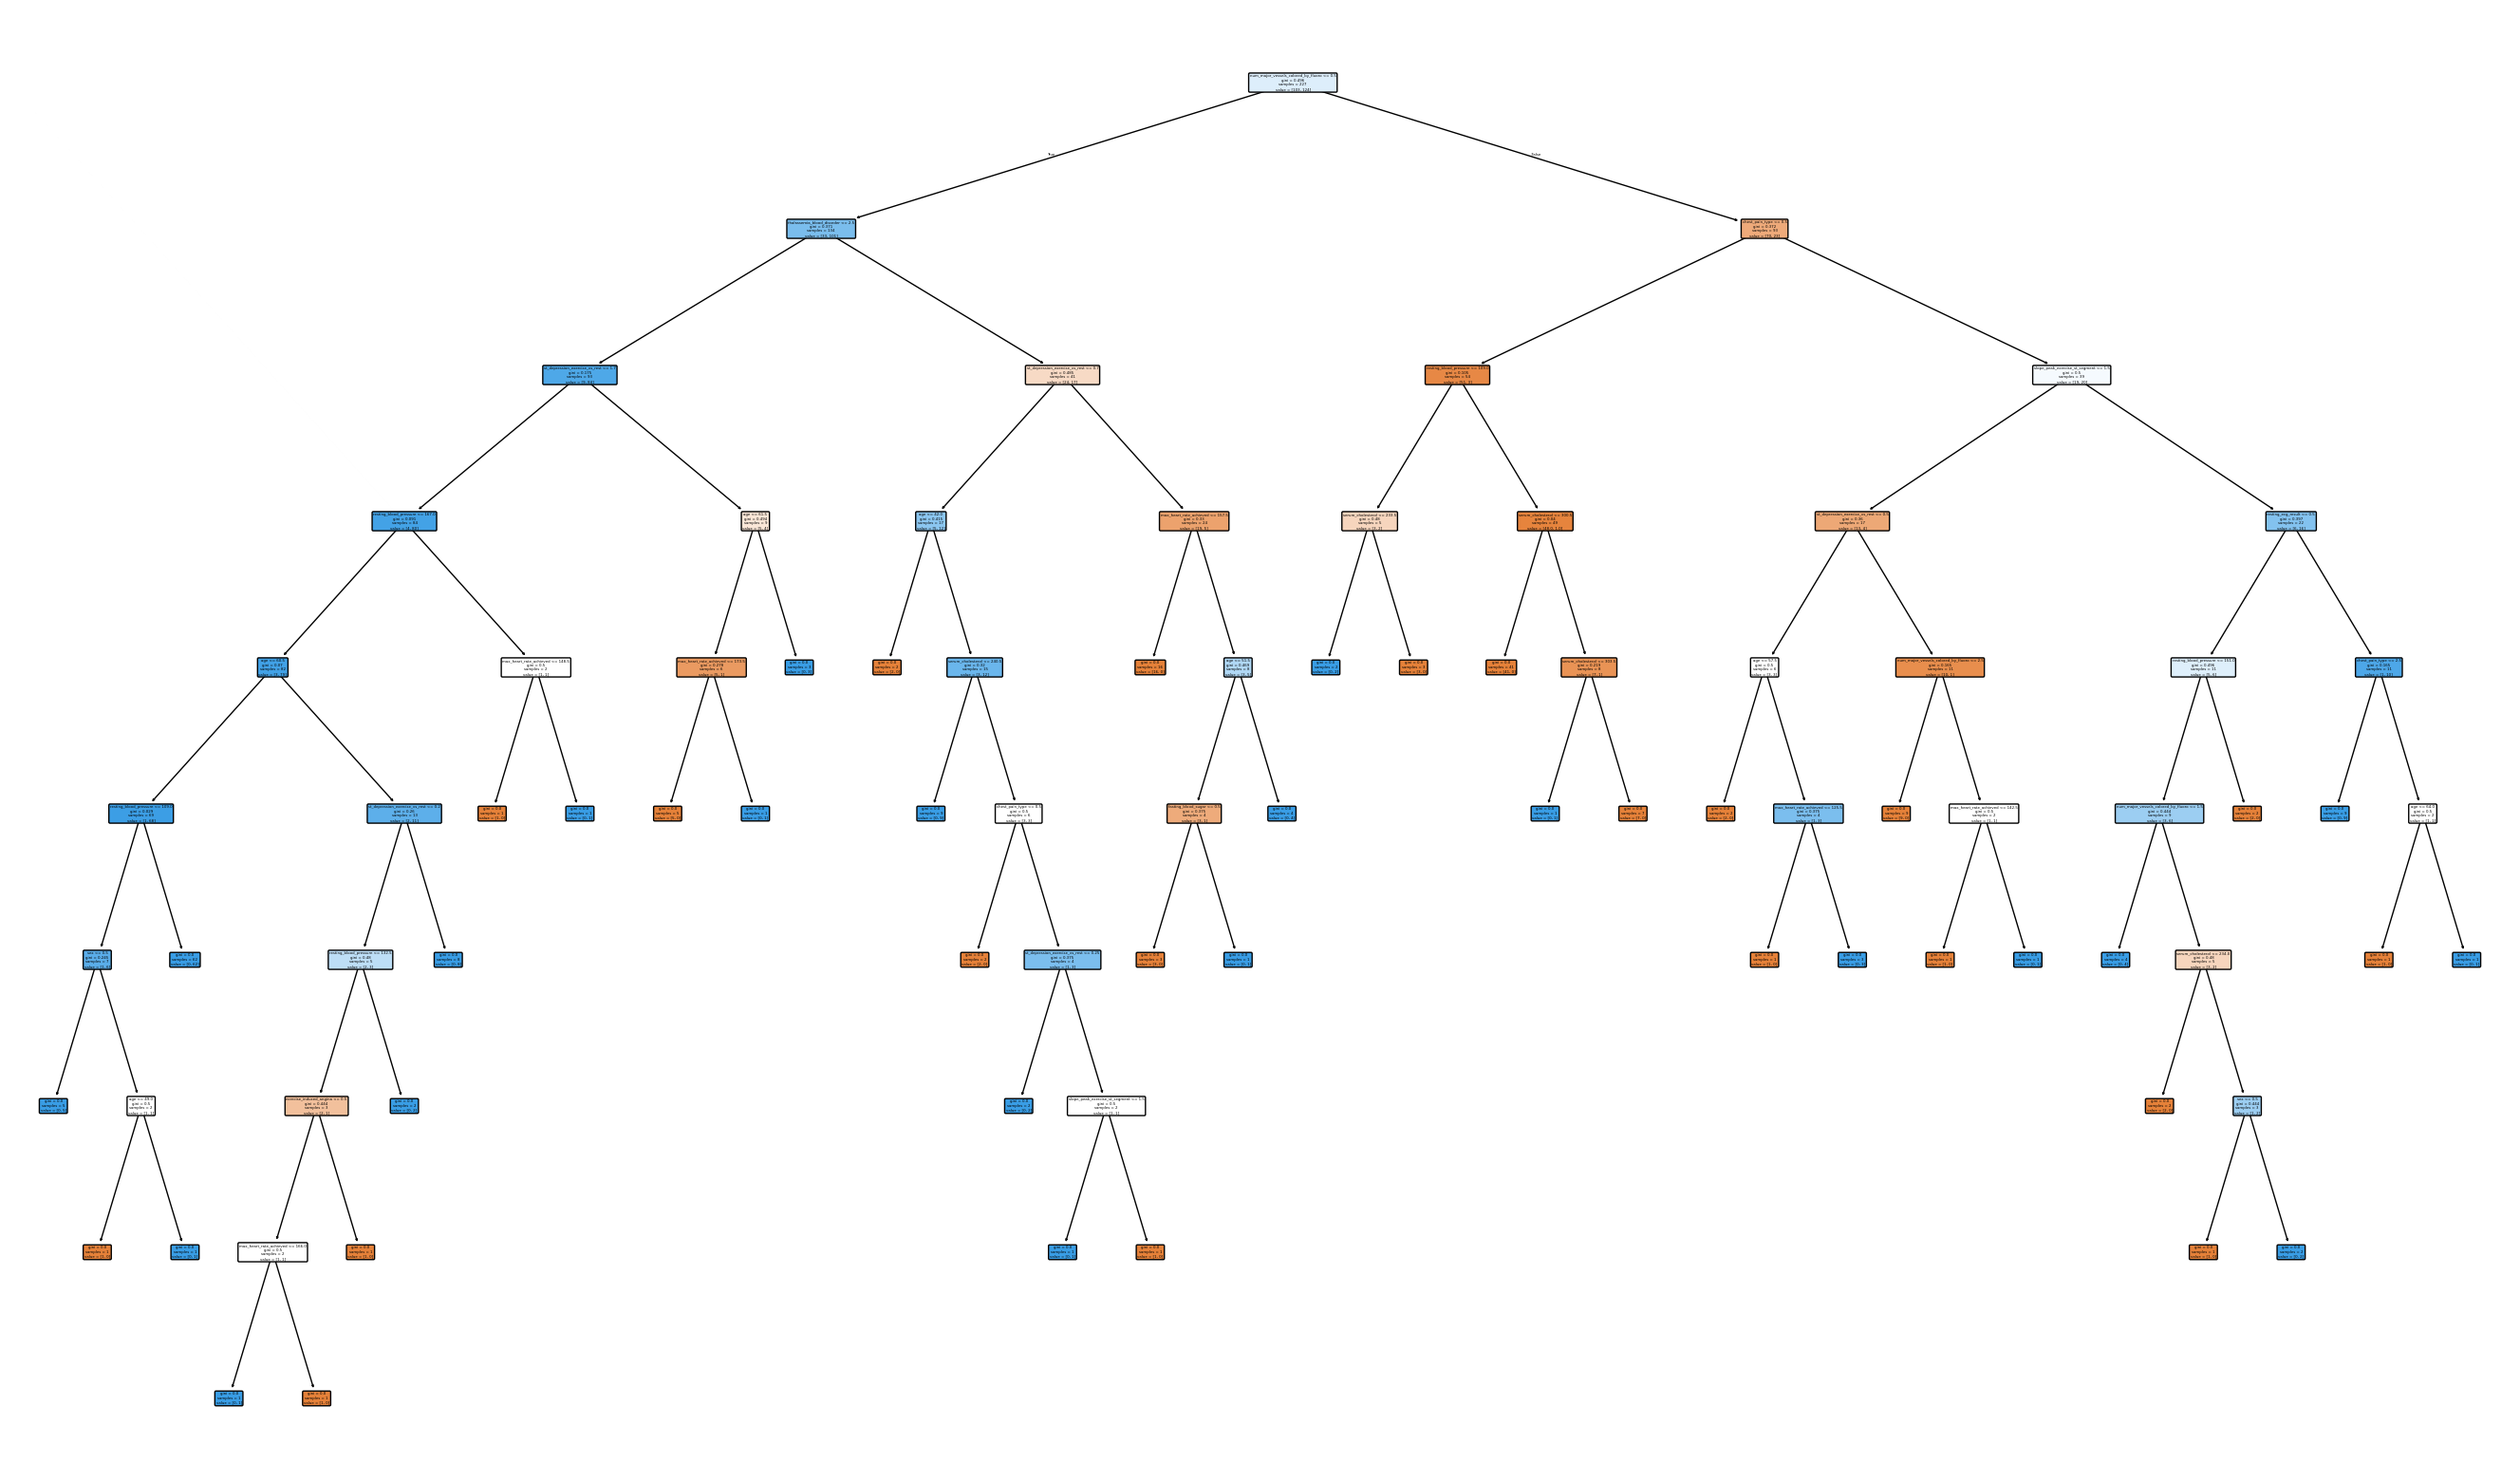

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(tree,filled = True, rounded=True,feature_names=list(X_train.columns))
plt.show()

## Random Forest

In [59]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on your training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
dpred2 = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, dpred2))
print("Precision:", precision_score(y_test, dpred2))
print("Recall:", recall_score(y_test, dpred2))

Accuracy: 0.8157894736842105
Precision: 0.813953488372093
Recall: 0.8536585365853658


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees
    'max_depth': [10, 20, 30, None],             # Max depth of trees
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider at each split
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
dpred3 = best_rf_model.predict(X_test)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estima

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
353 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

In [29]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, dpred3))
print("Precision:", precision_score(y_test, dpred3))
print("Recall:", recall_score(y_test, dpred3))

NameError: name 'dpred3' is not defined